In [3]:
import numpy as np
import matplotlib.pyplot as plt
# data generation and result ploting
import data
# my own implementation of gradient tape
from  autoGrad import GradTape, Var, Activatoins


# Generate Data

In [4]:
X1,Y1 = data.generate_linear(n=1000)
X2,Y2 = data.generate_XOR_easy()

# Parameters Settings

In [5]:
hyper_params = {
    'X' : X1.T,  # input data, each column represent one entry
    'Y' : Y1.T,  # ground truth label, each column represent one entry
    'lr' : 0.01, # learning rate
    'activation' :'relu', # activation of hidden layer, can be one of 'relu', 'sigmoid', 'tanh', or 'None'
    'l_n1' : 5, # number of units in first hidden layer
    'l_n2' : 5, # number of units in second hidden layer
    'max_iter' : 5000
}

# Train NN

In [6]:
def train(hp,log=False):
    X = hp['X']
    Y = hp['Y']
    # width of each layer
    l_n = [X.shape[0], hp['l_n1'], hp['l_n2'], Y.shape[0]]
    # initialize parameters
    W = []
    b = []
    for i in range(3):
        W.append(np.random.normal(size=(l_n[i+1],l_n[i])))
        b.append(np.random.uniform(size=(l_n[i+1],1)))
    
    if hp['activation']=='relu':
        act = Activatoins.Relu
    elif hp['activation'] == 'sigmoid':
        act = Activatoins.Sigmoid
    elif hp['activation'] == 'tanh':
        act = Activatoins.Tanh
    else: 
        act = None

    # construct and train NN
    with GradTape() as gt:
        # wrap Var class around numpy array for auto-grad recording
        W = [Var(w) for w in W]
        b = [Var(b_) for b_ in b]
        X = Var(X)
        Y = Var(Y)

        # layer 0~1
        Z1 = (W[0] @ X) + b[0]
        if act:
            A1 = Z1.activate(act)
        else:
            A1 = Z1
        
        # layer 1~2
        Z2 = (W[1] @ A1) + b[1]
        if act:
            A2 = Z2.activate(act)
        else:
            A2 = Z2
        
        # layer 2~3
        Z3 = (W[2] @ A2) + b[2]
        if act:
            A3 = Z3.activate(act)
        else:
            A3 = Z3
        Y_head = A3

        #loss func (we use l2 norm here)
        loss = (Y - Y_head) @ (Y - Y_head).T  * Var(np.array([[1/Y.shape[1]]])) 
        
        # training 
        loss_history = []
        acc_history = []
        for i in range(hp['max_iter']):
            # forward path
            gt.forward(loss)
            pred = Y_head.value>0.5
            acc = np.sum(pred == Y.value)/Y.shape[1]
            if i % 500 == 0 and log:
                print(f'epoch = {i:5<}, loss = {float(loss.value):<6.4f}, acc = {acc:<6.4f}')
                if acc == 1.0:
                    break;
            loss_history.append(float(loss.value))
            acc_history.append(acc)
            # backward path
            gt.backward(loss)
            # weight update
            for w, b_ in zip(W,b):
                w.value -= hp['lr'] * w.findGrad()
                b_.value -= hp['lr'] * b_.findGrad()

    result = {
        'pred': Y_head.value>0.5,
        'loss': np.array(loss_history),
        'acc': np.array(acc_history)
    }
    if log:
        print(Y_head.value[:,:21])
    return  result
    

In [7]:
r = train(hyper_params, log=True)

epoch = 0, loss = 0.5200, acc = 0.4790
epoch = 500, loss = 0.0475, acc = 0.9390
epoch = 1000, loss = 0.0320, acc = 0.9740
epoch = 1500, loss = 0.0290, acc = 0.9760
epoch = 2000, loss = 0.0265, acc = 0.9780
epoch = 2500, loss = 0.0242, acc = 0.9800
epoch = 3000, loss = 0.0223, acc = 0.9830
epoch = 3500, loss = 0.0206, acc = 0.9850
epoch = 4000, loss = 0.0191, acc = 0.9850
epoch = 4500, loss = 0.0179, acc = 0.9850
[[-0.          0.09354638  0.94213428  0.9448831   1.06431895  0.92415909
   1.03019028  1.01748007  0.97928119  0.06661224  0.41742854 -0.
   0.39227792  0.0359921  -0.          1.00108447 -0.         -0.
   0.54804886  0.92568877 -0.        ]]


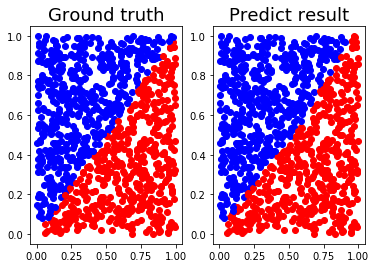

In [8]:
data.show_result(hyper_params['X'].T,hyper_params['Y'].T,r['pred'].T)

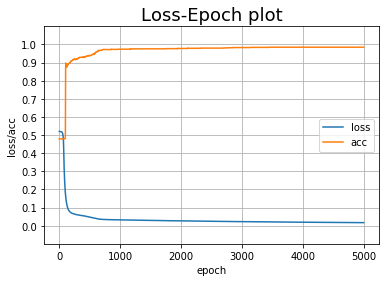

In [9]:
data.show_loss(r['loss'],r['acc'])

# Experiments

## 1. Another Dataset

In [10]:
hyper_params = {
    'X' : X2.T,  # input data, each column represent one entry
    'Y' : Y2.T,  # ground truth label, each column represent one entry
    'lr' : 0.1, # learning rate
    'activation' :'tanh', # activation of hidden layer, can be one of 'relu', 'sigmoid', 'tanh', or 'None'
    'l_n1' : 5, # number of units in first hidden layer
    'l_n2' : 5, # number of units in second hidden layer
    'max_iter' : 5000
}

In [11]:
r = train(hyper_params, log=True)

epoch = 0, loss = 2.4173, acc = 0.5238
epoch = 500, loss = 0.0202, acc = 1.0000
[[0.00557814 0.9294536  0.01138851 0.9260014  0.02549325 0.91346155
  0.05347586 0.85934756 0.07770028 0.54867652 0.08782983 0.08454848
  0.64269212 0.07399128 0.9041747  0.06265657 0.94492116 0.05501554
  0.95502369 0.05316119 0.95870364]]


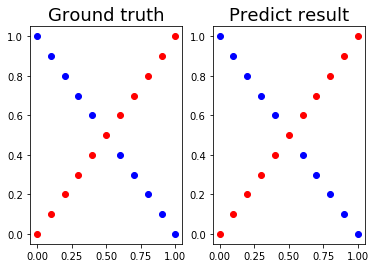

In [12]:
data.show_result(hyper_params['X'].T,hyper_params['Y'].T,r['pred'].T)

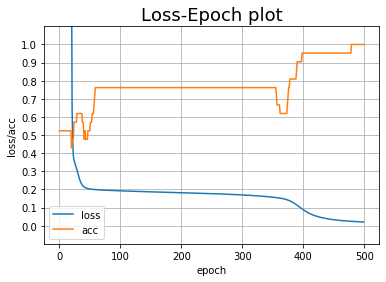

In [13]:
data.show_loss(r['loss'],r['acc'])

## 2. Different Learning Rates

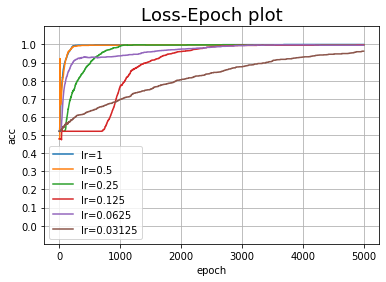

In [30]:
hyper_params = {
    'X' : X1.T,  # input data, each column represent one entry
    'Y' : Y1.T,  # ground truth label, each column represent one entry
    'lr' : None, # learning rate
    'activation' :'sigmoid', # activation of hidden layer, can be one of 'relu', 'sigmoid', 'tanh', or 'None'
    'l_n1' : 5, # number of units in first hidden layer
    'l_n2' : 5, # number of units in second hidden layer
    'max_iter' : 5000
}
rs = []
for i in range(0,6):
    hyper_params['lr'] = 2 ** (-i)
    rs.append( train(hyper_params, log=False) )

    #plt.plot(rs[-1]['loss'],label=f'lr={2**(-i)}')
    plt.plot(rs[-1]['acc'],label=f'lr={2**(-i)}')
plt.title('Loss-Epoch plot',fontsize=18)
plt.xlabel('epoch')
plt.ylabel('acc')
plt.yticks([0.1*i for i in range(11)])
plt.ylim([-0.1,1.1])
plt.legend()
plt.grid()
plt.show()

## 3. Different Numbers of Hidden Units

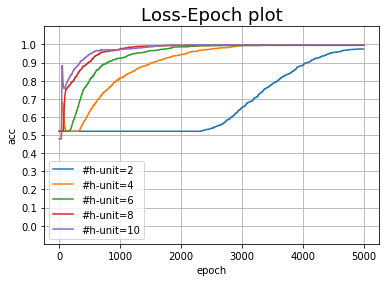

In [29]:
hyper_params = {
    'X' : X1.T,  # input data, each column represent one entry
    'Y' : Y1.T,  # ground truth label, each column represent one entry
    'lr' : 0.1, # learning rate
    'activation' :'sigmoid', # activation of hidden layer, can be one of 'relu', 'sigmoid', 'tanh', or 'None'
    'l_n1' : None, # number of units in first hidden layer
    'l_n2' : None, # number of units in second hidden layer
    'max_iter' : 5000
}
rs = []
for i in range(1,6):
    hyper_params['l_n1'] = 2*i
    hyper_params['l_n2'] = 2*i
    rs.append( train(hyper_params, log=False) )

    #plt.plot(rs[-1]['loss'],label=f'#h-unit={2*i}')
    plt.plot(rs[-1]['acc'],label=f'#h-unit={2*i}')
plt.title('Loss-Epoch plot',fontsize=18)
plt.xlabel('epoch')
plt.ylabel('acc')
plt.yticks([0.1*i for i in range(11)])
plt.ylim([-0.1,1.1])
plt.legend()
plt.grid()
plt.show()

## 4. Withoud Activation Functions

In [49]:
hyper_params = {
    'X' : X2.T,  # input data, each column represent one entry
    'Y' : Y2.T,  # ground truth label, each column represent one entry
    'lr' : 0.0001, # learning rate
    'activation' :'None', # activation of hidden layer, can be one of 'relu', 'sigmoid', 'tanh', or 'None'
    'l_n1' : 4, # number of units in first hidden layer
    'l_n2' : 4, # number of units in second hidden layer
    'max_iter' : 5000
}


In [50]:
r = train(hyper_params, log=True)

epoch = 0, loss = 93.4273, acc = 0.4762
epoch = 500, loss = 2.4923, acc = 0.4762
epoch = 1000, loss = 1.4748, acc = 0.5238
epoch = 1500, loss = 1.0594, acc = 0.5238
epoch = 2000, loss = 0.8345, acc = 0.5238
epoch = 2500, loss = 0.6920, acc = 0.4762
epoch = 3000, loss = 0.5935, acc = 0.4762
epoch = 3500, loss = 0.5218, acc = 0.4762
epoch = 4000, loss = 0.4678, acc = 0.4762
epoch = 4500, loss = 0.4263, acc = 0.4762
[[-0.37079719  0.28712359 -0.20841735  0.31791928 -0.0460375   0.34871497
   0.11634234  0.37951065  0.27872218  0.41030634  0.44110202  0.60348186
   0.47189771  0.7658617   0.50269339  0.92824155  0.53348908  1.09062139
   0.56428476  1.25300123  0.59508045]]


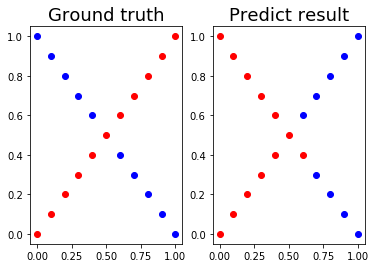

In [51]:
data.show_result(hyper_params['X'].T,hyper_params['Y'].T,r['pred'].T)

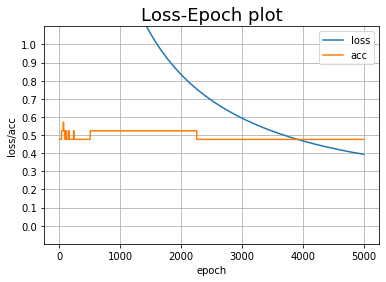

In [52]:
data.show_loss(r['loss'],r['acc'])